# Ultimate Challenge Questions

## Part 1: EDA for login counts

In [238]:
df_series = pd.read_json('/Users/shaunakphatak/Desktop/Springboard-Data-Science-Projects/Springboard-Data-Science/Machine Learning Case Studies/ultimate_challenge/logins.json')
df_series.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [239]:
#Function to plot time series and change duration as needed
def time_series(DF,param,start='2017-01-01 00:00:00',end=None):
    plt.figure()
    t_df = DF.loc[start:end,param]
    t_plot = t_df.plot(figsize=(15,10))
    plt.xlabel('Time')
    plt.ylabel(param)
    plt.title('Time series for '+param)
    fig = t_plot.get_figure()
    fig.savefig(param+'.png')

#Date Time Features
def time_features(df):
    df['Year'] = df['login_time'].dt.year
    df['Month_No'] = df['login_time'].dt.month
    df['Day_of_Week'] = df['login_time'].dt.dayofweek
    df['Hour'] = df['login_time'].dt.hour
    df['Day'] = df['login_time'].dt.day_name()
    df['Month'] = df['login_time'].dt.month_name()
    #df['Y/M'] = (df['login_time'].dt.to_period('M')).dt.strftime('(%Y, %m)')
    return df

In [240]:
df_series.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [241]:
df_series.set_index('login_time',inplace=True)
df_series['counts'] = 1

In [242]:
group_15 = df_series.groupby(pd.Grouper(freq='15Min')).aggregate(np.sum)

In [243]:
group_15 = group_15.reset_index()
group_15 = time_features(group_15).set_index('login_time')

In [244]:
group_15.head()

,counts,Year,Month_No,Day_of_Week,Hour,Day,Month
login_time,,,,,,,
1970-01-01 20:00:00,2,1970,1,3,20,Thursday,January
1970-01-01 20:15:00,6,1970,1,3,20,Thursday,January
1970-01-01 20:30:00,9,1970,1,3,20,Thursday,January
1970-01-01 20:45:00,7,1970,1,3,20,Thursday,January
1970-01-01 21:00:00,1,1970,1,3,21,Thursday,January


In [245]:
group_15.index.min(), group_15.index.max()

(Timestamp('1970-01-01 20:00:00'), Timestamp('1970-04-13 18:45:00'))

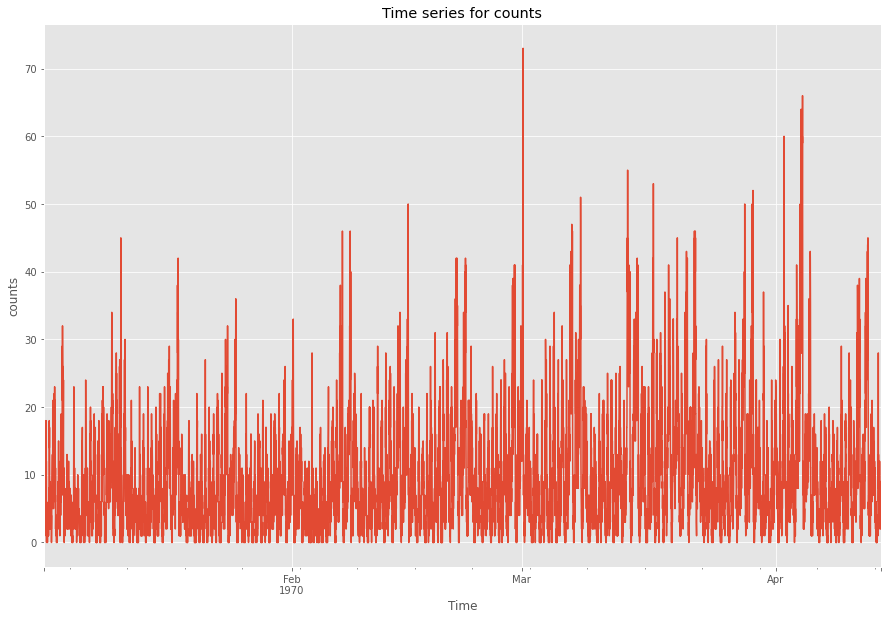

In [246]:
time_series(group_15,'counts',start='1970-01-01 20:00:00')

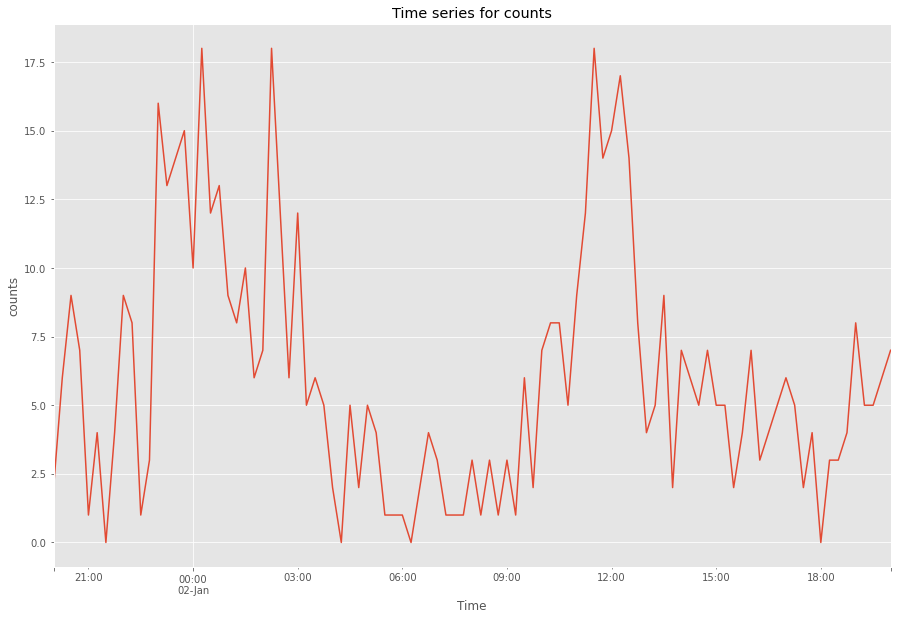

In [256]:
time_series(group_15,'counts',start='1970-01-01 20:00:00',end='1970-01-02 20:00:00')

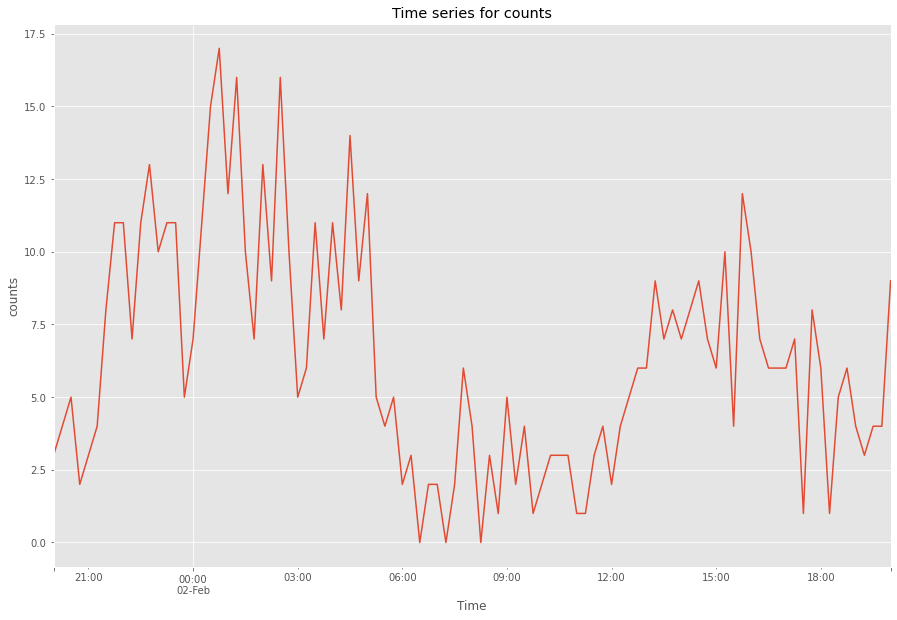

In [258]:
time_series(group_15,'counts',start='1970-02-01 20:00:00',end='1970-02-02 20:00:00')

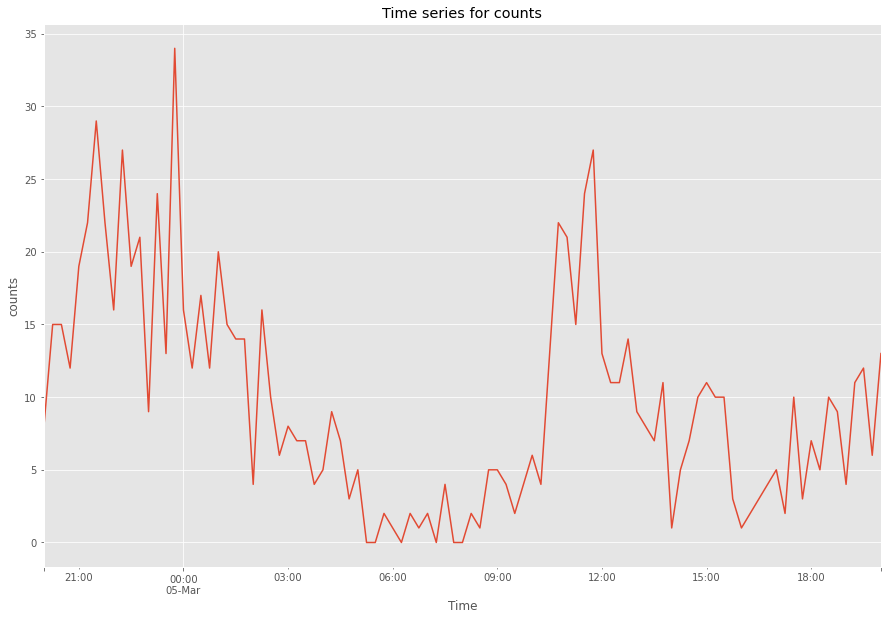

In [262]:
time_series(group_15,'counts',start='1970-03-04 20:00:00',end='1970-03-05 20:00:00')

Looking at a single day login time series, logins display two peaks, one during the late evening hours while another during the afternoon-hours which may be considered as lunch time hours.
Using the time features, we can check mean effects across hour of day as well as day of week as follows

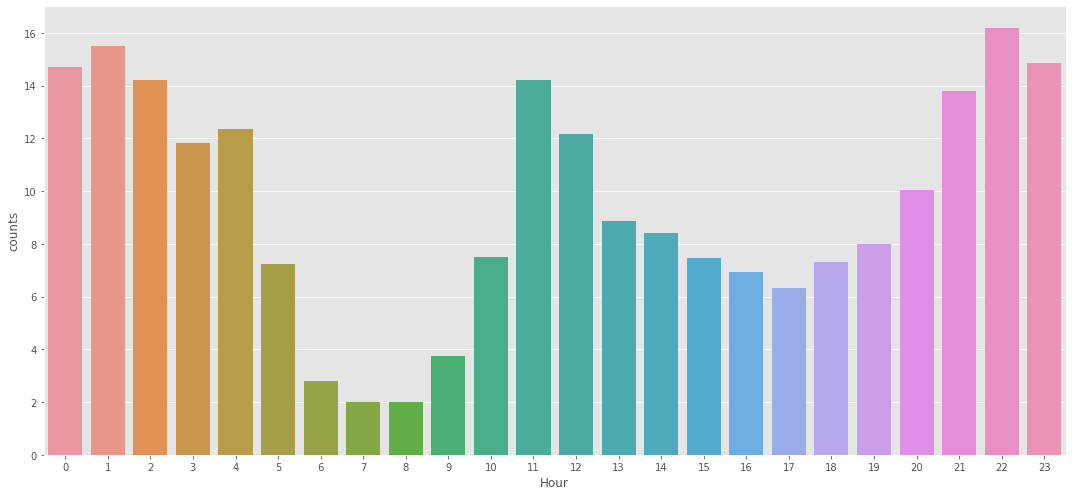

In [247]:
plt.figure(figsize=(15,7))
sns_h = sns.barplot(x='Hour',y='counts',data=group_15.groupby('Hour').mean().reset_index())
plt.xticks(rotation=0);
plt.tight_layout()
sns_h.get_figure().savefig('hourly_pm.jpg')

Looking at login counts for hour of day, the logins seem to increase from 8 pm and maintain high levels until 1 am. Thereafter they taper down during morning hours. They again increase from 10 am until 12 pm and again decrease in the afternoon to evening time frame.

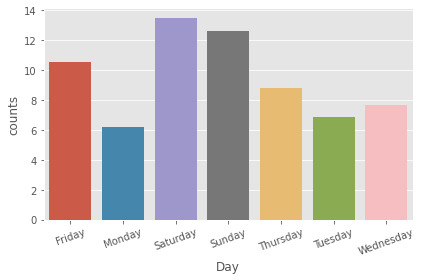

In [250]:
sns.barplot(x='Day',y='counts',data=group_15.groupby('Day').mean().reset_index())
plt.xticks(rotation=20);
plt.tight_layout()

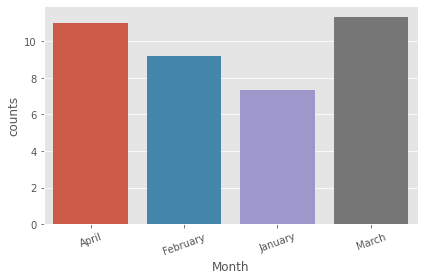

In [263]:
sns.barplot(x='Month',y='counts',data=group_15.groupby('Month').mean().reset_index())
plt.xticks(rotation=20);
plt.tight_layout()

More logins seen during the weekends compared to weekdays

### Summary for Part 1:
1. There may be a potential discrepancy with the login_time index which displays dates as 1970.
2. Assuming the login dates are correct, cyclical variations were seen across hour of day which had two peaks (late evening and afternoon) as well as higher number of logins during weekends
3. Cannot make a definite statement about month as data is not available for the entire year, except that January shows lower average counts which starts picking up across Febuary-April

## Part 2 Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

### Answer:

1. As a metric, we can consider the proportion of # of rides between the two cities for all drivers. If this experiment would work, this ratio should be close to 1:1
2. For the experiment, we can calculate the proportions of rides between the two cities for all riders before implementing the reimbursment policy and after implementing the policy.
    A paired t test can be conducted to check if the proportions 
    a. Null Hypothesis: The difference between mean proportions across both samples is zero
    b. Alternate Hypothesis: The difference between mean proportions is not zero

    The hypotheses should be 2 tailed as drivers can be exclusive to either cities.
    If the results are significant based on a level of significance that is chosen, we can conclude there is a difference between the mean of proportions of the two samples which would indicate that the experiment was successful. 

## Part 3: Predictive Modeling

In [24]:
#Import all necessary modules
from collections import defaultdict
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use('ggplot')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import scipy.stats as sc
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,accuracy_score,log_loss,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, RepeatedStratifiedKFold
import category_encoders as ce
from sklearn.metrics import plot_roc_curve
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from scipy import stats
from pandas.tseries.offsets import DateOffset

In [16]:
df = pd.read_json('/Users/shaunakphatak/Desktop/Springboard-Data-Science-Projects/Springboard-Data-Science/Machine Learning Case Studies/ultimate_challenge/ultimate_data_challenge.json')

In [17]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [18]:
df.shape

(50000, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [20]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date']) 

In [23]:
df[['signup_date','last_trip_date']].describe()

<ipython-input-23-dc0aa73793ec>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[['signup_date','last_trip_date']].describe()
<ipython-input-23-dc0aa73793ec>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[['signup_date','last_trip_date']].describe()


,signup_date,last_trip_date
count,50000,50000
unique,31,182
top,2014-01-18 00:00:00,2014-06-29 00:00:00
freq,2948,2036
first,2014-01-01 00:00:00,2014-01-01 00:00:00
last,2014-01-31 00:00:00,2014-07-01 00:00:00


To create a binary indicator for retained users, consider users as retained if they took a trip on or after 1st June 2014.

In [34]:
df['retained'] = np.where((df['last_trip_date'] >= '2014-06-01 00:00:00'),1,0)

In [39]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [36]:
df['retained'].value_counts(normalize=True)

0    0.62392
1    0.37608
Name: retained, dtype: float64

In [38]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

<AxesSubplot:xlabel='city', ylabel='count'>

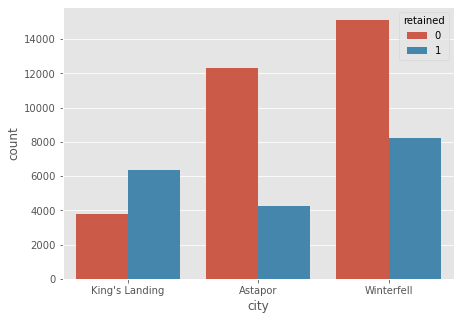

In [41]:
plt.figure(figsize=[7,5])
sns.countplot(x=df['city'],hue=df['retained'])

King's landing has a higher % of retention compared against the other two cities

In [45]:
df['Rating_of_Driver_bin'] = pd.cut(df['avg_rating_of_driver'],bins=[0,1,2,3,4,5])
df['Rating_by_Driver_bin'] = pd.cut(df['avg_rating_by_driver'],bins=[0,1,2,3,4,5])

<AxesSubplot:xlabel='Rating_of_Driver_bin', ylabel='count'>

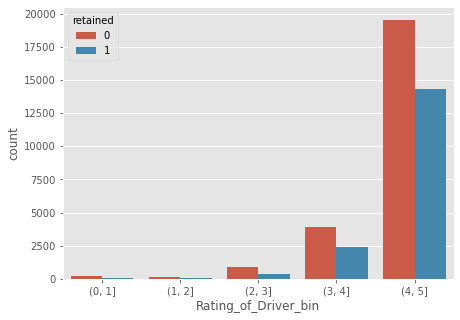

In [47]:
plt.figure(figsize=[7,5])
sns.countplot(x=df['Rating_of_Driver_bin'],hue=df['retained'])

<AxesSubplot:xlabel='Rating_of_Driver_bin', ylabel='count'>

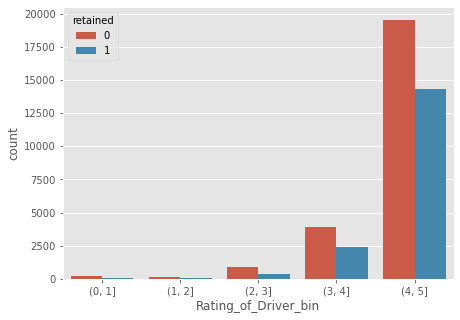

In [48]:
plt.figure(figsize=[7,5])
sns.countplot(x=df['Rating_of_Driver_bin'],hue=df['retained'])

Most retentions appear for ratings between 4 & 5 given by or to the driver

In [51]:
df['phone'].value_counts(normalize=True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

<AxesSubplot:xlabel='phone', ylabel='count'>

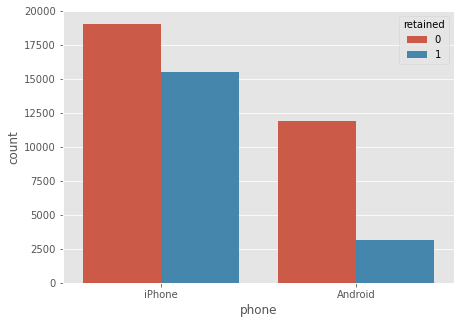

In [52]:
plt.figure(figsize=[7,5])
sns.countplot(x=df['phone'],hue=df['retained'])

A higher percentage of iphone users appear to be retained compared to android users

<AxesSubplot:xlabel='ultimate_black_user', ylabel='count'>

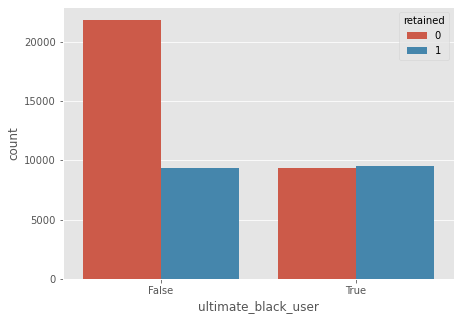

In [72]:
plt.figure(figsize=[7,5])
sns.countplot(x=df['ultimate_black_user'],hue=df['retained'])

Similar number of retained customers across ultimate black users and non-users

In [74]:
df['weekday_pct_bin'] = pd.cut(df['weekday_pct'],bins=[0,10,20,30,40,50,60,70,80,90,100])

<AxesSubplot:xlabel='weekday_pct_bin', ylabel='count'>

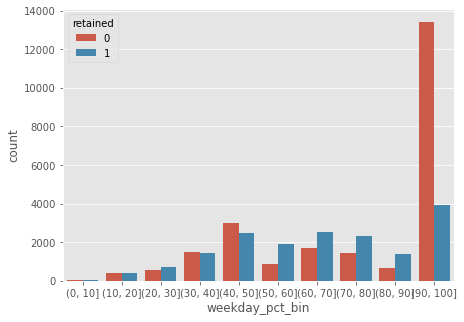

In [80]:
plt.figure(figsize=[7,5])
sns.countplot(x=df['weekday_pct_bin'],hue=df['retained'])

In [77]:
df['surge_pct_bin'] = pd.cut(df['surge_pct'],bins=[0,10,20,30,40,50,60,70,80,90,100])

<AxesSubplot:xlabel='surge_pct_bin', ylabel='count'>

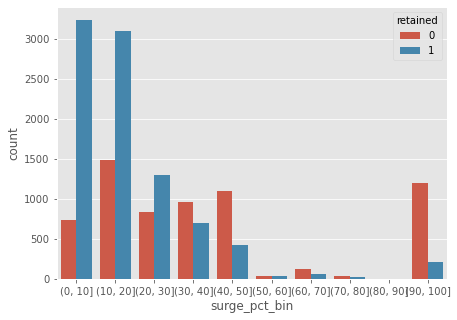

In [81]:
plt.figure(figsize=[7,5])
sns.countplot(x=df['surge_pct_bin'],hue=df['retained'])

A large % of retained users used a surge multiplier > 1 in 0-20 % of their trips

<AxesSubplot:>

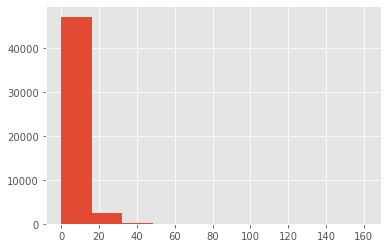

In [136]:
df['avg_dist'].hist()

In [137]:
df1 = df.drop(['signup_date','last_trip_date','Rating_of_Driver_bin','Rating_by_Driver_bin',
               'weekday_pct_bin', 'surge_pct_bin'],axis=1)

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   49604 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    49799 non-null  float64
 10  retained                50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 3.9+ MB


Average ratings by and for users have missing values. Also, the phone variable has missing values.
We can impute ratings with their mean while phone with the most frequent occurence.

In [139]:
df1['avg_rating_of_driver'].fillna(df1['avg_rating_of_driver'].mean(),inplace=True)
df1['avg_rating_by_driver'].fillna(df1['avg_rating_by_driver'].mean(),inplace=True)
df1['phone'].fillna(df1['phone'].value_counts().index[0],inplace=True)
df1['ultimate_black_user'] = np.where(df1['ultimate_black_user']==True,1,0)

In [140]:
df1.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0


<AxesSubplot:>

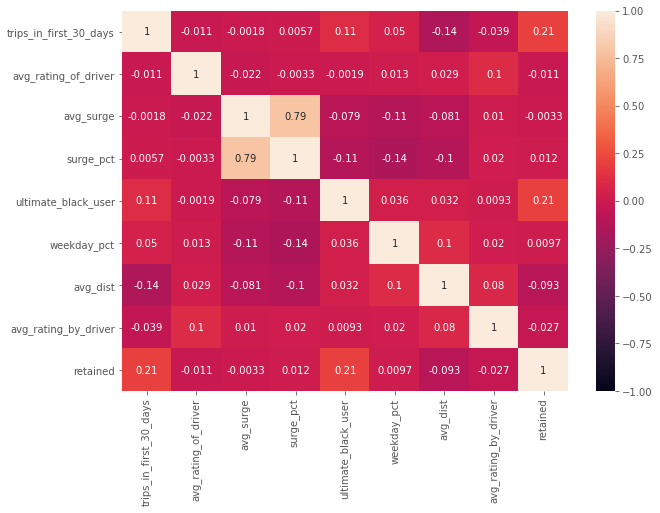

In [141]:
plt.figure(figsize=[10,7])
sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True)

In [142]:
df1 = pd.get_dummies(df1,drop_first=True)

In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  int64  
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   retained                50000 non-null  int64  
 9   city_King's Landing     50000 non-null  uint8  
 10  city_Winterfell         50000 non-null  uint8  
 11  phone_iPhone            50000 non-null  uint8  
dtypes: float64(6), int64(3), uint8(3)
memory usage: 3.6 MB


In [144]:
X = df1.drop(['retained'],axis=1)
y = df1['retained']

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [146]:
#Model
def model(model,X_train, X_test, y_train, y_test,feat_importance=True):
    mod.fit(X_train,y_train)
    y_tr_pred = mod.predict(X_train)
    y_tr_pred_prob = mod.predict_proba(X_train)
    y_te_pred = mod.predict(X_test)
    y_te_pred_prob = mod.predict_proba(X_test)
    if feat_importance == True:
        imp = pd.Series(mod.feature_importances_,X_train.columns).sort_values(ascending=True)
        imp.plot(kind='barh',title='Feature_Importance',figsize=(8,6),fontsize=12)
    #depth = [estimator.get_depth() for estimator in mod.estimators_]
    #print('Max Depth: ',max(depth))
    return y_tr_pred, y_tr_pred_prob,y_te_pred,y_te_pred_prob

In [148]:
# Classifier Results
def model_metrics(y_true,y_predicted,y_pred_prob):
    sns.heatmap(confusion_matrix(y_true,y_predicted),annot=True,fmt='g',cmap="Blues")
    plt.xlabel('Predicted Classes')
    plt.ylabel('Observed Classes')
    print('ROC_AUC Score: ' + str(roc_auc_score(y_true,y_pred_prob[:,1])))
    print('Accuracy_Score: ' + str(accuracy_score(y_true,y_predicted)))
    print('Precision_Score: ' + str(precision_score(y_true,y_predicted)))
    print('F1 Score: ' + str(f1_score(y_true,y_predicted)))
    print('Classification Report: ' + str(classification_report(y_true,y_predicted)))
    
# ROC / Precision Recall Curves
def roc_prerec(y_true,y_pred_prob):
    fpr, tpr, th = roc_curve(y_true,y_pred_prob[:,1])
    plt.figure(figsize=[10,10])
    plt.plot(fpr, tpr, linestyle='-.', label='Random Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    pre, re, the = precision_recall_curve(y_true,y_pred_prob[:,1])
    plt.figure(figsize=[10,10])
    plt.plot(re, pre, linestyle='-.', label='Random Forest')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend()

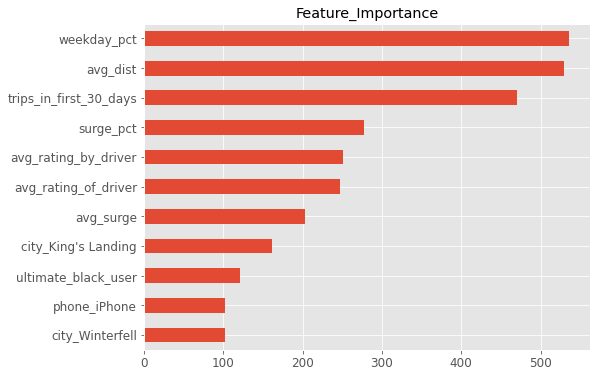

In [149]:
mod = LGBMClassifier()
y_tr_pred, y_tr_pred_prob,y_te_pred,y_te_pred_prob = model(mod,X_train, X_test, y_train, y_test,feat_importance=True)

Average distance, % trips during weekday and trips in the first 30 days are the top 3 factors that seem to govern customer retention.

ROC_AUC Score: 0.8783978402301537
Accuracy_Score: 0.806775
Precision_Score: 0.7706082581027083
F1 Score: 0.7293483209020555
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.88      0.85     24957
           1       0.77      0.69      0.73     15043

    accuracy                           0.81     40000
   macro avg       0.80      0.78      0.79     40000
weighted avg       0.80      0.81      0.80     40000



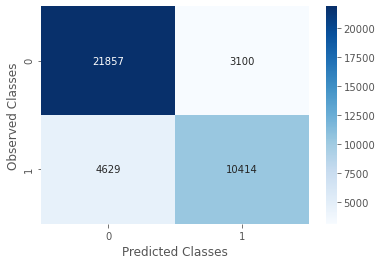

In [150]:
model_metrics(y_train,y_tr_pred,y_tr_pred_prob)

ROC_AUC Score: 0.8624590819326193
Accuracy_Score: 0.7947
Precision_Score: 0.7567648827420325
F1 Score: 0.7103146606462537
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.87      0.84      6239
           1       0.76      0.67      0.71      3761

    accuracy                           0.79     10000
   macro avg       0.79      0.77      0.78     10000
weighted avg       0.79      0.79      0.79     10000



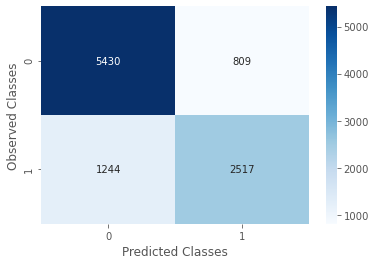

In [151]:
model_metrics(y_test,y_te_pred,y_te_pred_prob)